# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [23]:
import pandas as pd
serie_enum = pd.Series(range(1, len(df_airbnb)+1))
serie_enum
df_airbnb = pd.read_csv("airbnb.csv")



In [33]:
df_airbnb.head(20)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,Num_alojamientos
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,1
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,2
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,3
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,4
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,5
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,6
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,7
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,8
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,9
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,10


In [24]:
df_airbnb['Num_alojamientos'] = serie_enum
df_airbnb.dtypes


room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
Num_alojamientos          int64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [32]:
# Consejo: para mostrar 3 alternativas emplee head(3)



alojamientos_mas_reviews = df_airbnb['Num_alojamientos'].value_counts().nlargest(10)


#filtrar habitaciones con habitaciones separadas, más de 10 críticas y puntuación mayor a 4
filtro_habitaciones = (df_airbnb['bedrooms'] > 1) & (df_airbnb['reviews'] > 10) & (df_airbnb['overall_satisfaction'] > 4)
habitaciones_filtradas = df_airbnb[filtro_habitaciones]

habitaciones_ordenadas = habitaciones_filtradas.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

#seleccionar las tres mejores alternativas
alternativas = habitaciones_ordenadas.head(3)

#alternativas
print(alternativas[['room_id', 'neighborhood', 'reviews', 'overall_satisfaction', 'price']])


     room_id       neighborhood  reviews  overall_satisfaction  price
120   176153       Misericórdia      438                   5.0  102.0
16     44043  Santa Maria Maior      316                   5.0   80.0
140   202150  Santa Maria Maior      274                   5.0   62.0


 Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [96]:
#df_airbnb.dtypes

data = {
    'room_id': [97503, 90387],
    'host_id': [515924, 490050],
    'room_type': ['Private room', 'Private room'],
    'neighborhood': ['Santo António', 'Santo António'],
    'reviews': [39, 204],
    'overall_satisfaction': [4, 5],
    'accommodates': [2, 2],
    'bedrooms': [1, 1],
    'price': [26, 46]
}

df_roberto = pd.DataFrame(data)
df_roberto


df_roberto.to_csv('roberto.csv', index=False) #he generado un csv por que no se actualizaba mi libreria.



### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [77]:



filtro_habitaciones_compartidas = (df_airbnb['room_type'] == 'Shared room') & (df_airbnb['price'] <= 50)
habitaciones_compartidas = df_airbnb[filtro_habitaciones_compartidas]


habitaciones_compartidas_ordenadas = habitaciones_compartidas.sort_values(by=['price', 'overall_satisfaction'], ascending=[True, False])


propiedades_baratas = habitaciones_compartidas_ordenadas.head(10)

print(propiedades_baratas[['room_id', 'room_type', 'price', 'overall_satisfaction']])

        room_id    room_type  price  overall_satisfaction
1010    1179457  Shared room   10.0                   4.0
3562    5557699  Shared room   10.0                   4.0
7584   13116032  Shared room   10.0                   0.0
13148  19314160  Shared room   10.0                   0.0
9065   14933182  Shared room   11.0                   5.0
4353    6728244  Shared room   11.0                   4.5
5616    9317561  Shared room   11.0                   4.5
6640   11693356  Shared room   11.0                   4.5
6641   11693442  Shared room   11.0                   4.5
8908   14708916  Shared room   11.0                   4.5


In [76]:
df_airbnb.head(5)



,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,Num_alojamientos
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,1
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,2
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,3
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,4
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,5


## Usando MatPlot

In [71]:
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

In [83]:
#df_airbnb.columns
df_airbnb['room_type'].unique()



array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [93]:
conteo = df_airbnb['room_type'].value_counts()
print(conteo)
    

Entire home/apt    9764
Private room       3297
Shared room         171
Name: room_type, dtype: int64


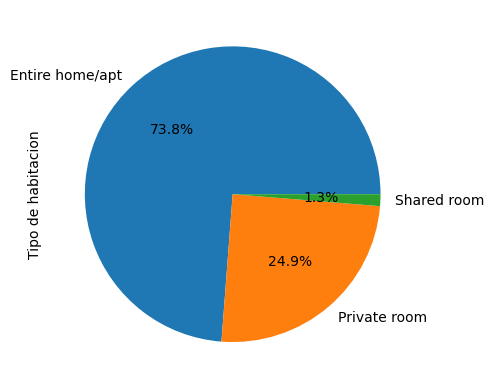

In [94]:
s = pd.Series([9764, 3297, 171], index=['Entire home/apt', 'Private room', 'Shared room'], name='Tipo de habitacion')
ax = s.plot.pie(autopct='%1.1f%%')
plt.show()